In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [3]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
X=data.data
y=data.target

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [8]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
y_pred=lr.predict(X_test)

In [12]:
from sklearn.metrics import r2_score,mean_squared_error

print('R2 score:',r2_score(y_test,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score: 0.5188118914964637
RMSE: 48.72710829141399


In [13]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=0.0001)

In [14]:
R.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [15]:
y_pred1=R.predict(X_test)

In [16]:
print('R2 score:',r2_score(y_test,y_pred1))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred1)))

R2 score: 0.5189738344370788
RMSE: 48.71890809371286


Note that the R2 score has incresed slightly when RidgeRegression model is used

# NOW WE WILL SHOW THE MATHEMATICAL INTUITION BEHIND RIDGE REGRESSION

In [17]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [19]:
X,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=10,random_state=13)

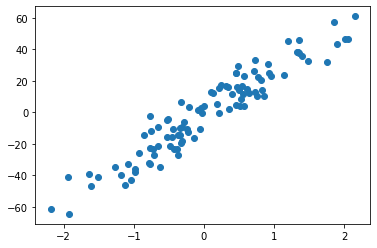

In [20]:
plt.scatter(X,y)

In [21]:
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.71819977]
-1.1473722793384897


In [22]:
from sklearn.linear_model import Ridge

In [23]:
rr=Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.85608255]
-0.9802034797539114


In [24]:
rr1=Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.88334387]
-0.28090704870856803


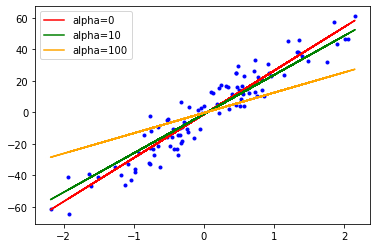

In [25]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')    #No regression
plt.plot(X,rr.predict(X),color='green',label='alpha=10')     #Good fitting
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')    #Underfitting
plt.legend()




In [32]:
class MeraRidge:
    
    def __init__(self,alpha=0.1): #If alpha value is not provided during calling the class, then aplha value will be considered as 0.1
        self.alpha=alpha
        self.m=None
        self.b=None
        
    def fit(self,X_train,y_train):
        num=0 #numerator
        den=0 #denominator
        
        for i in range(X_train.shape[0]):
            num=num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den=den + (X_train[i] - X_train.mean())**2   #Here we have not added the aplha value because it will get added multiple times because of the loop
            
        self.m= num/(den+self.alpha) # We have added alpha here instead of adding it inside the loop to avoid alpha getting added multiple times.
        self.b= y_train.mean() - self.m * X_train.mean()
        print(self.m,self.b)
    
    def predict(X_test):
        pass
    

In [33]:
reg=MeraRidge(alpha=10)

In [34]:
reg.fit(X,y)

[24.85608255] [-0.98020348]


# APPLYING RIDGE REGRESSION ON DATA HANING MORE THAN 2 DIMENSIONS